In [11]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
np.random.seed(9)
def f(x):
    return np.sin(2 * np.pi * x)
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))
# generate points used to plot
x_plot = np.linspace(0, 1, 100)
# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

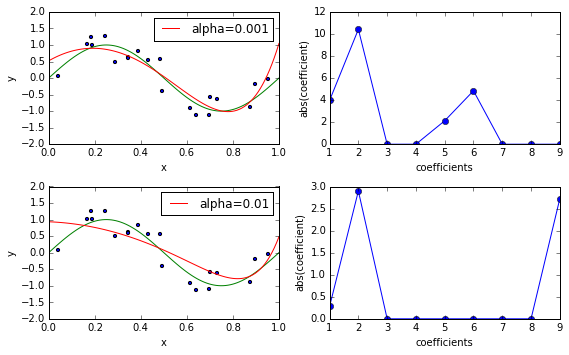

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

fig, ax_rows = plt.subplots(2, 2, figsize=(8, 5))

degree = 9
alphas = [1e-3, 1e-2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()

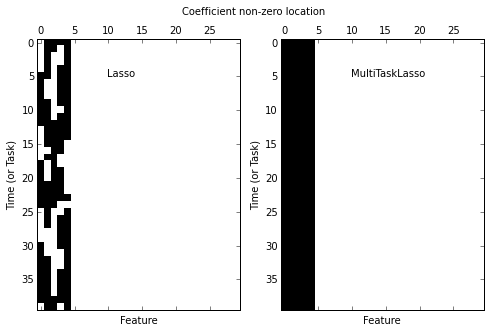

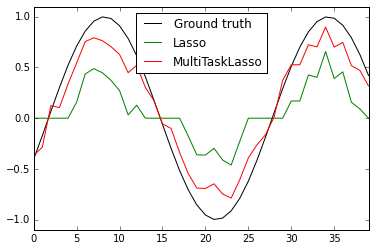

In [3]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

###############################################################################
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
plt.plot(coef[:, feature_to_plot], 'k', label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], 'g', label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot],
         'r', label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

In [4]:
print(coef_multi_task_lasso_)

[[-0.36689566 -0.64870018 -0.48725649 ...,  0.          0.          0.        ]
 [-0.28578986 -0.76248975 -0.42867474 ...,  0.          0.          0.        ]
 [ 0.12359781 -0.54994442 -0.31829233 ...,  0.          0.          0.        ]
 ..., 
 [ 0.51857103  0.78488141 -0.15328409 ...,  0.          0.          0.        ]
 [ 0.47027982  0.84901126 -0.62666168 ...,  0.          0.          0.        ]
 [ 0.31773425  0.54886048 -0.5543684  ...,  0.          0.          0.        ]]
